# Load Packages

In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# df_1 = pd.DataFrame({'x_1' : [3], 'x_2' : [2], 'x_3' : [4], 'x_4' : [1]})
df_1 = pd.DataFrame({'Method' : ['x_1', 'x_2', 'x_3', 'x_4'], 'AUC' : [3, 2, 4, 1]})

In [3]:
df_2 = pd.DataFrame({'Method' : ['x_1', 'x_2', 'x_3', 'x_4'], 'AUC' : [5, 1, 3, 2]})

In [4]:
df_1

,Method,AUC
0,x_1,3
1,x_2,2
2,x_3,4
3,x_4,1


In [5]:
df_2

,Method,AUC
0,x_1,5
1,x_2,1
2,x_3,3
3,x_4,2


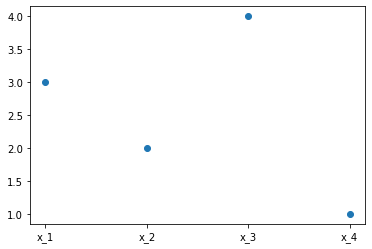

In [6]:
plt.scatter(df_1['Method'], df_1['AUC'])

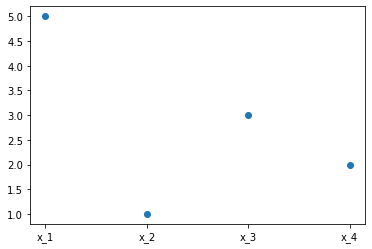

In [7]:
plt.scatter(df_2['Method'], df_2['AUC'])

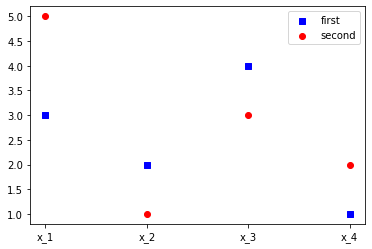

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(df_1['Method'], df_1['AUC'], c='b', marker="s", label='first')
ax1.scatter(df_2['Method'], df_2['AUC'], c='r', marker="o", label='second')
plt.legend(loc='upper right')
plt.show()

# Utilities

In [9]:
def constructPrefix(data_set_name:str, balanced:bool, encode:bool):
    prefix = ''
    if data_set_name == 'credit_card':
        if balanced:
            prefix = 'balanced_'
        else:
            prefix = 'unbalanced_'

    if encode:
        prefix =  "encoded_" + prefix 
        
    return prefix

In [10]:
def constructFilePath(directory_name:str, file_name:str, data_set_name:str, balanced:bool, encode:bool, tuned:bool):
    prefix = constructPrefix(data_set_name, balanced, encode)
    tuned_str = 'untuned'
    if tuned:
        tuned_str = 'tuned'

    file_path = directory_name + '/' + prefix + data_set_name + '_' + tuned_str + '_' + file_name + '.csv'
    if file_name == 'baseline_real_data_auc_score':
        file_path = directory_name + '/' + prefix + data_set_name + "_" + file_name + '.csv'
    return file_path

In [11]:
df_all_results_best_params = pd.DataFrame({'data_set_full_name' : [], 'train_roc' : [], 'val_roc' : [], 'test_roc' : [], 'total_time_GaussianCopula' : [],
                                         'total_time_CTGAN' : [], 'total_time_CopulaGAN' : [],  'total_time_TVAE' : [],
                                        'total_time_BO' : [] })

In [12]:
df_all_results_individual_models_performance = pd.DataFrame()

In [13]:
df_all_results_baseline_real_data_performance = pd.DataFrame({'data_set_full_name' : [], 'train_roc' : [], 'val_roc' : [], 'test_roc' : []})

In [14]:
file_name_clf_best_params = 'models_clf_best_param_xgboost'
file_name_alpha_params_sitory = 'models_params_alpha_history'
file_name_individual_clf_auc = 'models_clf_auc_score_and_time_per_each_individual_model'
directory_name_output = '../data/output'
directory_name_history = '../data/history'

print('file_name_clf_best_params: ', file_name_clf_best_params)
print('file_name_alpha_params_sitory: ', file_name_alpha_params_sitory)
print('file_name_individual_clf_auc: ', file_name_individual_clf_auc)
print('directory_name_output: ', directory_name_output)
print('directory_name_history: ', directory_name_history)

file_name_clf_best_params:  models_clf_best_param_xgboost
file_name_alpha_params_sitory:  models_params_alpha_history
file_name_individual_clf_auc:  models_clf_auc_score_and_time_per_each_individual_model
directory_name_output:  ../data/output
directory_name_history:  ../data/history


# Adult Data Set Untuned without Target Encoder

In [15]:
data_set_name = 'adult'
target = 'income'
encode = False
balanced = False
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Adult'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  False
balanced:  False
prefix:  
data_set_full_name:  Adult
directory_name_data:  ../data/adult


### Load Best Params

In [16]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/adult_untuned_models_clf_best_param_xgboost.csv


In [17]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.407969,0.514566,0.63972,0.404454,0.916033,0.889585,0.889537,16.34615,Adult


In [18]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.34615,0.407969,0.514566,0.63972,0.404454


### Individual Models Performance

In [19]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/adult_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [20]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.83419,0.849814,10000.0,9035.0,4532.0,4.59275,3.551519,18.336205,5.602223,Adult


In [21]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.83419,0.849814,10000.0,9035.0,4532.0,4.59275,3.551519,18.336205,5.602223,Adult


### LoadH istory

In [22]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/adult_untuned_models_params_alpha_history.csv


In [23]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.134214,0.148914,0.556185,0.160688,0.0,10000.0,0.911377,0.884545,Adult
1,0.479759,0.139293,0.214355,0.166593,0.0,10000.0,0.888554,0.875505,Adult
2,0.398876,0.243544,0.303841,0.053740,0.0,10000.0,0.891612,0.880602,Adult
3,0.136642,0.468530,0.181383,0.213445,0.0,10000.0,0.923012,0.885146,Adult
4,0.370382,0.371956,0.067346,0.190316,0.0,10000.0,0.907386,0.877725,Adult
...,...,...,...,...,...,...,...,...,...
145,0.252678,0.207393,0.342704,0.197226,0.0,10000.0,0.911588,0.879655,Adult
146,0.210930,0.273880,0.320601,0.194588,0.0,10000.0,0.915478,0.879528,Adult
147,0.325547,0.183856,0.286312,0.204285,0.0,10000.0,0.900821,0.885268,Adult
148,0.231361,0.263699,0.311624,0.193317,0.0,10000.0,0.912433,0.880436,Adult


In [24]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.911377,0.884545
1,0.888554,0.875505
2,0.891612,0.880602
3,0.923012,0.885146
4,0.907386,0.877725
...,...,...
145,0.911588,0.879655
146,0.915478,0.879528
147,0.900821,0.885268
148,0.912433,0.880436


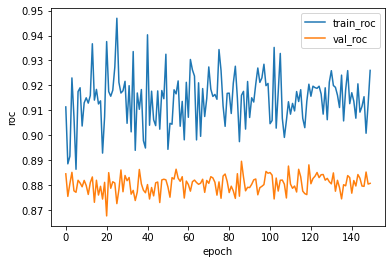

In [25]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

### Baseline Model Performance (XGBoost only real data)

In [26]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/adult_baseline_real_data_auc_score.csv


In [27]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,0.999411,0.903646,0.910906,31655.0,9035.0,4532.0,Adult


In [28]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999411,0.903646,0.910906,31655.0,9035.0,4532.0


# Adult Data Set Untuned with Target Encoder

In [29]:
data_set_name = 'adult'
target = 'income'
encode = True
balanced = False
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Adult Transformed'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  True
balanced:  False
prefix:  encoded_
data_set_full_name:  Adult Transformed
directory_name_data:  ../data/adult


### Load Best Params

In [30]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/encoded_adult_untuned_models_clf_best_param_xgboost.csv


In [31]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.961965,0.005415,0.5784,0.914273,0.909061,0.872117,0.874446,17.538814,Adult Transformed


In [32]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.63972,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.57840,0.914273


### Individual Models Performance

In [33]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/encoded_adult_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [34]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.85789,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed


In [35]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.83419,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.85789,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed


### Load History 

In [36]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/encoded_adult_untuned_models_params_alpha_history.csv


In [37]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.234611,0.464881,0.001087,0.299421,0.0,10000.0,0.887316,0.827941,Adult Transformed
1,0.236537,0.307168,0.152349,0.303945,0.0,10000.0,0.886260,0.849360,Adult Transformed
2,0.230750,0.070229,0.275879,0.423142,0.0,10000.0,0.912282,0.865128,Adult Transformed
3,0.404448,0.150915,0.363716,0.080922,0.0,10000.0,0.875786,0.849339,Adult Transformed
4,0.042731,0.057047,0.837042,0.063179,0.0,10000.0,0.914450,0.847941,Adult Transformed
...,...,...,...,...,...,...,...,...,...
145,0.569633,0.031627,0.065043,0.333697,0.0,10000.0,0.889182,0.859531,Adult Transformed
146,0.570641,0.060786,0.043588,0.324985,0.0,10000.0,0.882205,0.860619,Adult Transformed
147,0.603225,0.002580,0.033694,0.360501,0.0,10000.0,0.890462,0.869823,Adult Transformed
148,0.629021,0.023427,0.009540,0.338012,0.0,10000.0,0.888856,0.864300,Adult Transformed


In [38]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.887316,0.827941
1,0.886260,0.849360
2,0.912282,0.865128
3,0.875786,0.849339
4,0.914450,0.847941
...,...,...
145,0.889182,0.859531
146,0.882205,0.860619
147,0.890462,0.869823
148,0.888856,0.864300


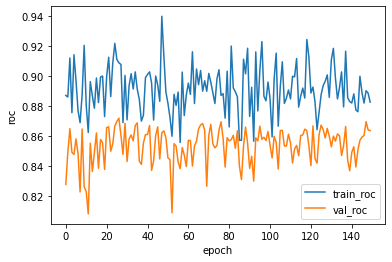

In [39]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

### Baseline Model Performance (XGBoost only real data)

In [40]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/encoded_adult_baseline_real_data_auc_score.csv


In [41]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,0.999183,0.902436,0.915966,31655.0,9035.0,4532.0,Adult Transformed


In [42]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999411,0.903646,0.910906,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999183,0.902436,0.915966,31655.0,9035.0,4532.0


# Imbalanced Credit Card Data Set Untuned without Target Encoder

In [43]:
data_set_name = 'credit_card'
target = 'Class'
encode = False
balanced = False
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Credit Imbalanced'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  Class
encode:  False
balanced:  False
prefix:  unbalanced_
data_set_full_name:  Credit Imbalanced
directory_name_data:  ../data/credit_card


### Load Best Params

In [44]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/unbalanced_credit_card_untuned_models_clf_best_param_xgboost.csv


In [45]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.249037,0.184867,0.000743,0.409941,0.775082,0.999875,0.893686,27.136444,Credit Imbalanced


In [46]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.639720,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.578400,0.914273
2,Credit Imbalanced,0.775082,0.999875,0.893686,NaN,NaN,NaN,NaN,27.136444,0.249037,0.184867,0.000743,0.409941


### Individual Models Performance

In [47]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/unbalanced_credit_card_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [48]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.999925,0.883756,0.5,0.5,0.0,0.5,0.5,0.0,0.5,0.5,0.0,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced


In [49]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.83419,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.85789,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.50000,0.000000,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced


### Load History

In [50]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/unbalanced_credit_card_untuned_models_params_alpha_history.csv


In [51]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.146492,0.217793,0.433751,0.201964,0.0,10000.0,0.999934,0.499900,Credit Imbalanced
1,0.343386,0.150519,0.102478,0.403616,0.0,10000.0,0.999927,0.499950,Credit Imbalanced
2,0.302011,0.469947,0.119025,0.109018,0.0,10000.0,0.999949,0.499850,Credit Imbalanced
3,0.440118,0.309831,0.060983,0.189068,0.0,10000.0,0.999887,0.499950,Credit Imbalanced
4,0.372871,0.354657,0.257905,0.014567,0.0,10000.0,0.999717,0.499850,Credit Imbalanced
...,...,...,...,...,...,...,...,...,...
145,0.309400,0.273014,0.068562,0.349023,0.0,10000.0,0.999989,0.499950,Credit Imbalanced
146,0.420260,0.270397,0.000328,0.309015,0.0,10000.0,0.867574,0.987275,Credit Imbalanced
147,0.313223,0.169038,0.095749,0.421991,0.0,10000.0,0.999967,0.499950,Credit Imbalanced
148,0.269254,0.413772,0.022337,0.294637,0.0,10000.0,0.999996,0.499950,Credit Imbalanced


In [52]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.999934,0.499900
1,0.999927,0.499950
2,0.999949,0.499850
3,0.999887,0.499950
4,0.999717,0.499850
...,...,...
145,0.999989,0.499950
146,0.867574,0.987275
147,0.999967,0.499950
148,0.999996,0.499950


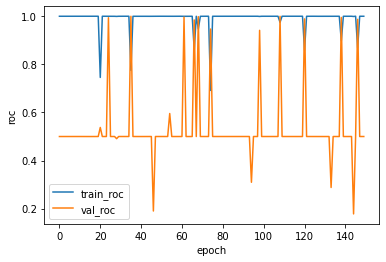

In [53]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

# Baseline Model Performance (XGBoost only real data)

In [54]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/unbalanced_credit_card_baseline_real_data_auc_score.csv


In [55]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,1.0,0.99996,0.885594,35000.0,9990.0,5010.0,Credit Imbalanced


In [56]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999411,0.903646,0.910906,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999183,0.902436,0.915966,31655.0,9035.0,4532.0
2,Credit Imbalanced,NaN,NaN,NaN,1.000000,0.999960,0.885594,35000.0,9990.0,5010.0


# Balanced Credit Card Data Set Untuned without Target Encoder

In [57]:
data_set_name = 'credit_card'
target = 'Class'
encode = False
balanced = True
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Credit Balanced'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  Class
encode:  False
balanced:  True
prefix:  balanced_
data_set_full_name:  Credit Balanced
directory_name_data:  ../data/credit_card


### Load Best Params

In [58]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/balanced_credit_card_untuned_models_clf_best_param_xgboost.csv


In [59]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.015637,0.135764,0.090172,0.998436,0.994374,0.976351,0.974412,27.677052,Credit Balanced


In [60]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.639720,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.578400,0.914273
2,Credit Imbalanced,0.775082,0.999875,0.893686,NaN,NaN,NaN,NaN,27.136444,0.249037,0.184867,0.000743,0.409941
3,Credit Balanced,0.994374,0.976351,0.974412,NaN,NaN,NaN,NaN,27.677052,0.015637,0.135764,0.090172,0.998436


### Individual Models Performance

In [61]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/balanced_credit_card_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [62]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.94693,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.105412,3.137067,3.28023,3.292883,Credit Balanced


In [63]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.834190,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.105412,3.137067,3.280230,3.292883,Credit Balanced


### Load History

In [64]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/balanced_credit_card_untuned_models_params_alpha_history.csv


In [65]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.371265,0.247973,0.090654,0.290107,0.0,10000.0,0.990348,0.969706,Credit Balanced
1,0.087639,0.124222,0.315947,0.472192,0.0,10000.0,0.992282,0.969990,Credit Balanced
2,0.494001,0.072811,0.172206,0.260981,0.0,10000.0,0.986854,0.970174,Credit Balanced
3,0.008616,0.198670,0.478222,0.314491,0.0,10000.0,0.993666,0.971433,Credit Balanced
4,0.350640,0.342304,0.287994,0.019063,0.0,10000.0,0.990158,0.947861,Credit Balanced
...,...,...,...,...,...,...,...,...,...
145,0.082077,0.050062,0.039302,0.828560,0.0,10000.0,0.994660,0.973970,Credit Balanced
146,0.003286,0.040665,0.063601,0.892448,0.0,10000.0,0.995315,0.975041,Credit Balanced
147,0.087984,0.139240,0.105551,0.667226,0.0,10000.0,0.993437,0.974200,Credit Balanced
148,0.012611,0.109486,0.072719,0.805185,0.0,10000.0,0.994374,0.976351,Credit Balanced


In [66]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.990348,0.969706
1,0.992282,0.969990
2,0.986854,0.970174
3,0.993666,0.971433
4,0.990158,0.947861
...,...,...
145,0.994660,0.973970
146,0.995315,0.975041
147,0.993437,0.974200
148,0.994374,0.976351


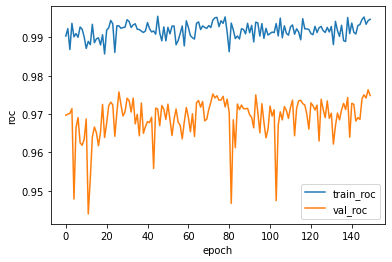

In [67]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

# Baseline Model Performance (XGBoost only real data)

In [68]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/balanced_credit_card_baseline_real_data_auc_score.csv


In [69]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,1.0,0.999906,0.999943,35000.0,9990.0,5010.0,Credit Balanced


In [70]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999411,0.903646,0.910906,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999183,0.902436,0.915966,31655.0,9035.0,4532.0
2,Credit Imbalanced,NaN,NaN,NaN,1.000000,0.999960,0.885594,35000.0,9990.0,5010.0
3,Credit Balanced,NaN,NaN,NaN,1.000000,0.999906,0.999943,35000.0,9990.0,5010.0


# Adult Data Set Tuned without Target Encoder

In [71]:
data_set_name = 'adult'
target = 'income'
encode = False
balanced = False
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = prefix + 'tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  False
balanced:  False
prefix:  
data_set_full_name:  tuned_adult
directory_name_data:  ../data/adult


### Load Best Params

In [72]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/adult_tuned_models_clf_best_param_xgboost.csv


In [73]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.642246,0.59966,0.378508,0.56751,0.909284,0.884764,0.883772,18.182034,tuned_adult


In [74]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.639720,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.578400,0.914273
2,Credit Imbalanced,0.775082,0.999875,0.893686,NaN,NaN,NaN,NaN,27.136444,0.249037,0.184867,0.000743,0.409941
3,Credit Balanced,0.994374,0.976351,0.974412,NaN,NaN,NaN,NaN,27.677052,0.015637,0.135764,0.090172,0.998436
4,tuned_adult,0.909284,0.884764,0.883772,NaN,NaN,NaN,NaN,18.182034,0.642246,0.599660,0.378508,0.567510


### Individual Models Performance

In [75]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/adult_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [76]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.825294,0.863377,10000.0,9035.0,4532.0,4.733512,3.552977,3.445711,3.495922,tuned_adult


In [77]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.834190,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.105412,3.137067,3.280230,3.292883,Credit Balanced
4,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.825294,0.863377,10000.0,9035.0,4532.0,4.733512,3.552977,3.445711,3.495922,tuned_adult


### Load History

In [78]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/adult_tuned_models_params_alpha_history.csv


# Adult Data Set Tuned with Target Encoder

In [79]:
data_set_name = 'adult'
target = 'income'
encode = True
balanced = False
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = prefix + 'tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  True
balanced:  False
prefix:  encoded_
data_set_full_name:  encoded_tuned_adult
directory_name_data:  ../data/adult


### Load Best Params

In [80]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/encoded_adult_tuned_models_clf_best_param_xgboost.csv


In [81]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.546502,0.00403,0.303484,0.647195,0.913095,0.872477,0.873298,16.600163,encoded_tuned_adult


In [82]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.639720,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.578400,0.914273
2,Credit Imbalanced,0.775082,0.999875,0.893686,NaN,NaN,NaN,NaN,27.136444,0.249037,0.184867,0.000743,0.409941
3,Credit Balanced,0.994374,0.976351,0.974412,NaN,NaN,NaN,NaN,27.677052,0.015637,0.135764,0.090172,0.998436
4,tuned_adult,0.909284,0.884764,0.883772,NaN,NaN,NaN,NaN,18.182034,0.642246,0.599660,0.378508,0.567510
5,encoded_tuned_adult,0.913095,0.872477,0.873298,NaN,NaN,NaN,NaN,16.600163,0.546502,0.004030,0.303484,0.647195


### Individual Models Performance

In [83]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/encoded_adult_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [84]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.85789,0.863489,10000.0,9035.0,4532.0,4.707164,3.821334,3.566607,3.369756,encoded_tuned_adult


In [85]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.834190,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.105412,3.137067,3.280230,3.292883,Credit Balanced
4,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.825294,0.863377,10000.0,9035.0,4532.0,4.733512,3.552977,3.445711,3.495922,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.707164,3.821334,3.566607,3.369756,encoded_tuned_adult


### Load History

In [86]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/encoded_adult_tuned_models_params_alpha_history.csv


# Imbalanced Credit Card Data Set Tuned without Target Encoder

In [87]:
data_set_name = 'credit_card'
target = 'income'
encode = False
balanced = False
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name =  'imbalanced_tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  income
encode:  False
balanced:  False
prefix:  unbalanced_
data_set_full_name:  imbalanced_tuned_credit_card
directory_name_data:  ../data/credit_card


### Load Best Params

In [88]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/unbalanced_credit_card_tuned_models_clf_best_param_xgboost.csv


In [89]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.811651,0.270975,0.001101,0.338015,0.89908,0.999835,0.978342,12.422832,imbalanced_tuned_credit_card


In [90]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.639720,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.578400,0.914273
2,Credit Imbalanced,0.775082,0.999875,0.893686,NaN,NaN,NaN,NaN,27.136444,0.249037,0.184867,0.000743,0.409941
3,Credit Balanced,0.994374,0.976351,0.974412,NaN,NaN,NaN,NaN,27.677052,0.015637,0.135764,0.090172,0.998436
4,tuned_adult,0.909284,0.884764,0.883772,NaN,NaN,NaN,NaN,18.182034,0.642246,0.599660,0.378508,0.567510
5,encoded_tuned_adult,0.913095,0.872477,0.873298,NaN,NaN,NaN,NaN,16.600163,0.546502,0.004030,0.303484,0.647195
6,imbalanced_tuned_credit_card,0.899080,0.999835,0.978342,NaN,NaN,NaN,NaN,12.422832,0.811651,0.270975,0.001101,0.338015


### Individual Models Performance

In [91]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/unbalanced_credit_card_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [92]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.999925,0.883756,0.5,0.5,0.0,0.5,0.5,0.0,0.5,0.5,0.0,10000.0,9990.0,5010.0,2.299421,0.004232,0.004324,0.003403,imbalanced_tuned_credit_card


In [93]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.834190,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.105412,3.137067,3.280230,3.292883,Credit Balanced
4,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.825294,0.863377,10000.0,9035.0,4532.0,4.733512,3.552977,3.445711,3.495922,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.707164,3.821334,3.566607,3.369756,encoded_tuned_adult
6,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,2.299421,0.004232,0.004324,0.003403,imbalanced_tuned_credit_card


### Load History

# Balanced Credit Card Data Set Tuned without Target Encoder

In [94]:
data_set_name = 'credit_card'
target = 'income'
encode = False
balanced = True
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = prefix + 'tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  income
encode:  False
balanced:  True
prefix:  balanced_
data_set_full_name:  balanced_tuned_credit_card
directory_name_data:  ../data/credit_card


### Laod Best Params

In [95]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/balanced_credit_card_tuned_models_clf_best_param_xgboost.csv


In [96]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.219945,0.131313,0.155678,0.948794,0.992763,0.975454,0.972124,16.310777,balanced_tuned_credit_card


In [97]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.639720,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.578400,0.914273
2,Credit Imbalanced,0.775082,0.999875,0.893686,NaN,NaN,NaN,NaN,27.136444,0.249037,0.184867,0.000743,0.409941
3,Credit Balanced,0.994374,0.976351,0.974412,NaN,NaN,NaN,NaN,27.677052,0.015637,0.135764,0.090172,0.998436
4,tuned_adult,0.909284,0.884764,0.883772,NaN,NaN,NaN,NaN,18.182034,0.642246,0.599660,0.378508,0.567510
5,encoded_tuned_adult,0.913095,0.872477,0.873298,NaN,NaN,NaN,NaN,16.600163,0.546502,0.004030,0.303484,0.647195
6,imbalanced_tuned_credit_card,0.899080,0.999835,0.978342,NaN,NaN,NaN,NaN,12.422832,0.811651,0.270975,0.001101,0.338015
7,balanced_tuned_credit_card,0.992763,0.975454,0.972124,NaN,NaN,NaN,NaN,16.310777,0.219945,0.131313,0.155678,0.948794


### Individual Models Performance

In [98]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/balanced_credit_card_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [99]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.94693,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.25008,3.212666,3.185873,3.353989,balanced_tuned_credit_card


In [100]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.834190,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.105412,3.137067,3.280230,3.292883,Credit Balanced
4,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.825294,0.863377,10000.0,9035.0,4532.0,4.733512,3.552977,3.445711,3.495922,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.707164,3.821334,3.566607,3.369756,encoded_tuned_adult
6,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,2.299421,0.004232,0.004324,0.003403,imbalanced_tuned_credit_card
7,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.250080,3.212666,3.185873,3.353989,balanced_tuned_credit_card


### Load History

# Save All Results

In [101]:
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4
0,Adult,0.916033,0.889585,0.889537,NaN,NaN,NaN,NaN,16.346150,0.407969,0.514566,0.639720,0.404454
1,Adult Transformed,0.909061,0.872117,0.874446,NaN,NaN,NaN,NaN,17.538814,0.961965,0.005415,0.578400,0.914273
2,Credit Imbalanced,0.775082,0.999875,0.893686,NaN,NaN,NaN,NaN,27.136444,0.249037,0.184867,0.000743,0.409941
3,Credit Balanced,0.994374,0.976351,0.974412,NaN,NaN,NaN,NaN,27.677052,0.015637,0.135764,0.090172,0.998436
4,tuned_adult,0.909284,0.884764,0.883772,NaN,NaN,NaN,NaN,18.182034,0.642246,0.599660,0.378508,0.567510
5,encoded_tuned_adult,0.913095,0.872477,0.873298,NaN,NaN,NaN,NaN,16.600163,0.546502,0.004030,0.303484,0.647195
6,imbalanced_tuned_credit_card,0.899080,0.999835,0.978342,NaN,NaN,NaN,NaN,12.422832,0.811651,0.270975,0.001101,0.338015
7,balanced_tuned_credit_card,0.992763,0.975454,0.972124,NaN,NaN,NaN,NaN,16.310777,0.219945,0.131313,0.155678,0.948794


In [102]:
df_all_results_best_params.to_csv('../data/df_all_results_best_params.csv')

In [103]:
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999411,0.903646,0.910906,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999183,0.902436,0.915966,31655.0,9035.0,4532.0
2,Credit Imbalanced,NaN,NaN,NaN,1.000000,0.999960,0.885594,35000.0,9990.0,5010.0
3,Credit Balanced,NaN,NaN,NaN,1.000000,0.999906,0.999943,35000.0,9990.0,5010.0


In [104]:
df_all_results_baseline_real_data_performance.to_csv('../data/df_all_results_baseline_real_data_performance.csv')

In [105]:
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.834190,0.849814,10000.0,9035.0,4532.0,4.592750,3.551519,18.336205,5.602223,Adult
1,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.741346,4.019137,3.475874,3.411682,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,0.607333,0.004818,0.003244,0.002533,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.105412,3.137067,3.280230,3.292883,Credit Balanced
4,1.0,0.794258,0.762358,1.0,0.799043,0.810699,1.0,0.791052,0.779402,1.0,0.825294,0.863377,10000.0,9035.0,4532.0,4.733512,3.552977,3.445711,3.495922,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.769479,0.758356,1.0,0.727912,0.786382,1.0,0.857890,0.863489,10000.0,9035.0,4532.0,4.707164,3.821334,3.566607,3.369756,encoded_tuned_adult
6,1.0,0.999925,0.883756,0.5,0.500000,0.000000,0.5,0.500000,0.000000,0.5,0.500000,0.000000,10000.0,9990.0,5010.0,2.299421,0.004232,0.004324,0.003403,imbalanced_tuned_credit_card
7,1.0,0.932462,0.931923,1.0,0.951741,0.950619,1.0,0.946930,0.950468,1.0,0.984506,0.982199,10000.0,9990.0,5010.0,4.250080,3.212666,3.185873,3.353989,balanced_tuned_credit_card


In [106]:
df_all_results_individual_models_performance.to_csv('../data/df_all_results_individual_models_performance.csv')

In [107]:
columns_needed_val = ['data_set_full_name', 'clf_auc_val_gaussain_copula', 'clf_auc_val_ct_gan', 'clf_auc_val_copula_gan', 'clf_auc_val_tvae']
df_all_results_individual_models_performance[columns_needed_val]

,data_set_full_name,clf_auc_val_gaussain_copula,clf_auc_val_ct_gan,clf_auc_val_copula_gan,clf_auc_val_tvae
0,Adult,0.794258,0.799043,0.791052,0.834190
1,Adult Transformed,0.815603,0.769479,0.727912,0.857890
2,Credit Imbalanced,0.999925,0.500000,0.500000,0.500000
3,Credit Balanced,0.932462,0.951741,0.946930,0.984506
4,tuned_adult,0.794258,0.799043,0.791052,0.825294
5,encoded_tuned_adult,0.815603,0.769479,0.727912,0.857890
6,imbalanced_tuned_credit_card,0.999925,0.500000,0.500000,0.500000
7,balanced_tuned_credit_card,0.932462,0.951741,0.946930,0.984506


In [108]:
columns_needed_test = ['data_set_full_name', 'clf_auc_test_gaussain_copula', 'clf_auc_test_ct_gan', 'clf_auc_test_copula_gan', 'clf_auc_test_tvae']
# df_all_results_individual_models_performance[columns_needed_test]
df_all_results_individual_models_performance[columns_needed_val]

,data_set_full_name,clf_auc_val_gaussain_copula,clf_auc_val_ct_gan,clf_auc_val_copula_gan,clf_auc_val_tvae
0,Adult,0.794258,0.799043,0.791052,0.834190
1,Adult Transformed,0.815603,0.769479,0.727912,0.857890
2,Credit Imbalanced,0.999925,0.500000,0.500000,0.500000
3,Credit Balanced,0.932462,0.951741,0.946930,0.984506
4,tuned_adult,0.794258,0.799043,0.791052,0.825294
5,encoded_tuned_adult,0.815603,0.769479,0.727912,0.857890
6,imbalanced_tuned_credit_card,0.999925,0.500000,0.500000,0.500000
7,balanced_tuned_credit_card,0.932462,0.951741,0.946930,0.984506


In [109]:
columns_needed = ['data_set_full_name', 'val_roc']
df_all_results_best_params[columns_needed]

,data_set_full_name,val_roc
0,Adult,0.889585
1,Adult Transformed,0.872117
2,Credit Imbalanced,0.999875
3,Credit Balanced,0.976351
4,tuned_adult,0.884764
5,encoded_tuned_adult,0.872477
6,imbalanced_tuned_credit_card,0.999835
7,balanced_tuned_credit_card,0.975454


# Plot Results

In [110]:
model_GaussianCopula = 'GaussianCopula'
model_CTGAN = 'CTGAN'
model_CopulaGAN = 'CopulaGAN'
model_TVAE = 'TVAE'
model_TunedCTGAN = 'T-CTGAN'
model_TunedCopulaGAN = 'T-CopulaGAN'
model_TunedTVAE = 'T-TVAE'
model_CGOAT = 'C-GOAT'
model_SCGOAT = 'SC-GOAT'

In [111]:
adut_data_set = 'Adult'
encoded_adut_data_set = 'Adult Transformed'
balanced_credit_card_data_set = 'Credit Balanced'
imbalanced_credit_card_data_set = 'Credit Imbalanced'

tuned_adut_data_set = 'tuned_adult'
tuned_encoded_adut_data_set = 'encoded_tuned_adult'
tuned_balanced_credit_card_data_set = 'balanced_tuned_credit_card'
tuned_imbalanced_credit_card_data_set = 'imbalanced_tuned_credit_card'


In [112]:
def generateDataFrameAllModelsResults(data_set:str, metric:str):
    columns_needed_individual_models = ['data_set_full_name', 'clf_auc_' + metric + '_gaussain_copula', 'clf_auc_' + metric + '_ct_gan', 'clf_auc_' + metric + '_copula_gan', 'clf_auc_' + metric + '_tvae']
    df_temp_individual_models = df_all_results_individual_models_performance[columns_needed_individual_models]
    df_temp_individual_models = df_temp_individual_models.loc[df_all_results_individual_models_performance['data_set_full_name']==data_set]
    auc_model_GaussianCopula = df_temp_individual_models['clf_auc_' + metric + '_gaussain_copula'].values[0]
    auc_model_CTGAN = df_temp_individual_models['clf_auc_' + metric + '_ct_gan'].values[0]
    auc_model_CopulaGAN = df_temp_individual_models['clf_auc_' + metric + '_copula_gan'].values[0]
    auc_model_TVAE = df_temp_individual_models['clf_auc_' + metric + '_tvae'].values[0]
    
    columns_needed_our_method = ['data_set_full_name', metric + '_roc']
    df_temp_our_method = df_all_results_best_params[columns_needed_our_method]
    df_temp_our_method = df_temp_our_method.loc[df_all_results_best_params['data_set_full_name']==data_set]
    
    auc_our_appraoch = df_temp_our_method[metric + '_roc'].values[0]
    
    df_results = pd.DataFrame({'Method' : [model_GaussianCopula, model_CTGAN, model_CopulaGAN, model_TVAE, model_CGOAT], 
                                 'AUC' : [auc_model_GaussianCopula, auc_model_CTGAN, auc_model_CopulaGAN, auc_model_TVAE, auc_our_appraoch]})
    return df_results

In [113]:
colors = {adut_data_set : 'b', encoded_adut_data_set : 'g', balanced_credit_card_data_set : 'r', imbalanced_credit_card_data_set : 'k',
         tuned_adut_data_set : 'b', tuned_encoded_adut_data_set : 'g', tuned_balanced_credit_card_data_set : 'r', tuned_imbalanced_credit_card_data_set : 'k'}

# Untuned Results

In [114]:
results = {}

In [115]:
metric = 'val'
data_set = adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult
metric:  val


In [116]:
metric = 'test'
data_set = adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult
metric:  test


In [117]:
metric = 'val'
data_set = encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult Transformed
metric:  val


In [118]:
metric = 'test'
data_set = encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult Transformed
metric:  test


In [119]:
metric = 'val'
data_set = balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Balanced
metric:  val


In [120]:
metric = 'test'
data_set = balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Balanced
metric:  test


In [121]:
metric = 'val'
data_set = imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Imbalanced
metric:  val


In [122]:
metric = 'test'
data_set = imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Imbalanced
metric:  test


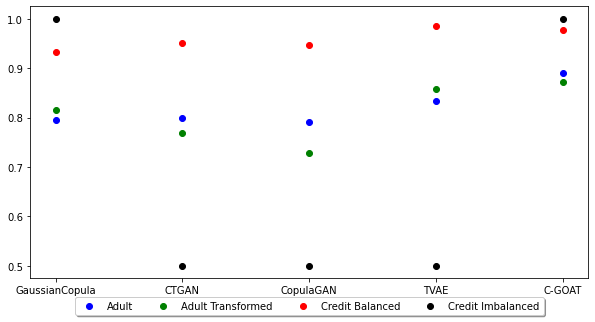

In [123]:
metric = 'val'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

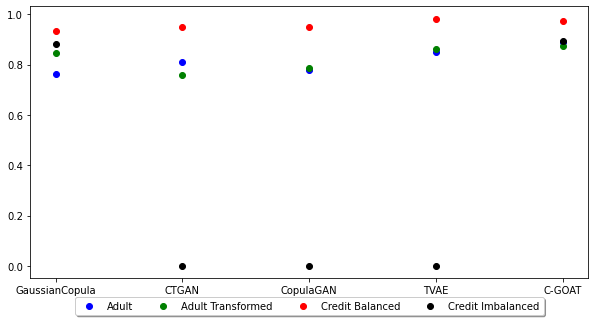

In [124]:
metric = 'test'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

# Tuned Results 

In [125]:
results = {}

In [126]:
metric = 'val'
data_set = tuned_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  tuned_adult
metric:  val


In [127]:
metric = 'test'
data_set = tuned_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  tuned_adult
metric:  test


In [128]:
metric = 'val'
data_set = tuned_encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  encoded_tuned_adult
metric:  val


In [129]:
metric = 'test'
data_set = tuned_encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  encoded_tuned_adult
metric:  test


In [130]:
metric = 'val'
data_set = tuned_balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  balanced_tuned_credit_card
metric:  val


In [131]:
metric = 'test'
data_set = tuned_balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  balanced_tuned_credit_card
metric:  test


In [132]:
metric = 'val'
data_set = tuned_imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  imbalanced_tuned_credit_card
metric:  val


In [133]:
metric = 'test'
data_set = tuned_imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  imbalanced_tuned_credit_card
metric:  test


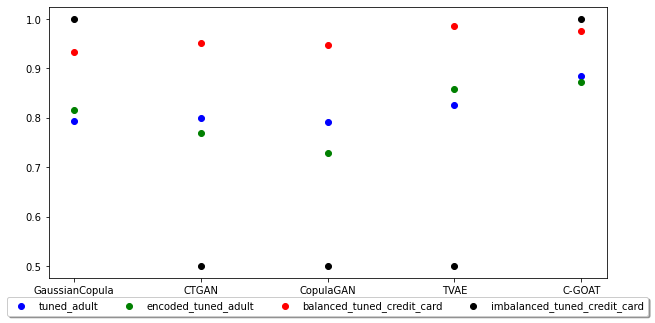

In [134]:
metric = 'val'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

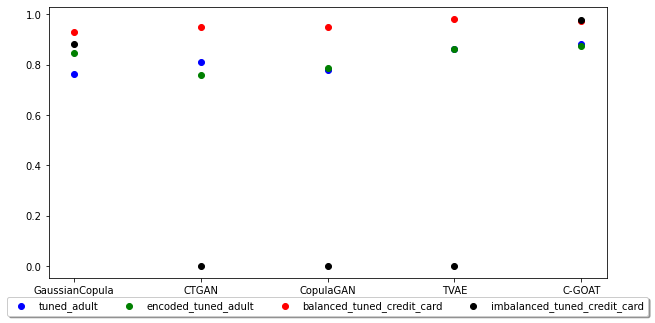

In [135]:
metric = 'test'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

In [136]:
metric = 'val'
columns_needed_individual_models = ['data_set_full_name', 'clf_auc_' + metric + '_gaussain_copula', 'clf_auc_' + metric + '_ct_gan', 'clf_auc_' + metric + '_copula_gan', 'clf_auc_' + metric + '_tvae']
df_temp_ = df_all_results_individual_models_performance[columns_needed_individual_models]

In [137]:
df_temp_
df_gaussain_copula_results = df_temp_[['data_set_full_name', 'clf_auc_val_gaussain_copula']]
df_ct_gan_results = df_temp_[['data_set_full_name', 'clf_auc_val_ct_gan']]
df_copula_gan_results = df_temp_[['data_set_full_name', 'clf_auc_val_copula_gan']]
df_tvae_results = df_temp_[['data_set_full_name', 'clf_auc_val_tvae']]
df_tvae_results
df_gaussain_copula_results_tuned = df_gaussain_copula_results.loc[df_gaussain_copula_results['data_set_full_name'].isin(['adult', 'encoded_adult', 'unbalanced_credit_card', 'balanced_credit_card'])]

In [138]:
df_gaussain_copula_results_tuned 

,data_set_full_name,clf_auc_val_gaussain_copula


In [139]:
columns_needed_our_method = ['data_set_full_name', metric + '_roc']
df_temp_our_method = df_all_results_best_params[columns_needed_our_method]
df_temp_our_method

,data_set_full_name,val_roc
0,Adult,0.889585
1,Adult Transformed,0.872117
2,Credit Imbalanced,0.999875
3,Credit Balanced,0.976351
4,tuned_adult,0.884764
5,encoded_tuned_adult,0.872477
6,imbalanced_tuned_credit_card,0.999835
7,balanced_tuned_credit_card,0.975454


In [140]:
#color for method
#x-axis for data set

In [141]:
#Another approach
def generateDataFrameAllModelsResults(metric:str, tuned:bool):
    columns_needed_individual_models = ['data_set_full_name', 'clf_auc_' + metric + '_gaussain_copula', 'clf_auc_' + metric + '_ct_gan', 'clf_auc_' + metric + '_copula_gan', 'clf_auc_' + metric + '_tvae']
    df_temp_individual_models = df_all_results_individual_models_performance[columns_needed_individual_models]
    columns_needed_our_method = ['data_set_full_name', metric + '_roc']
    df_temp_our_method = df_all_results_best_params[columns_needed_our_method]
    df_gaussain_copula_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_gaussain_copula']]
    df_ct_gan_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_ct_gan']]
    df_copula_gan_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_copula_gan']]
    df_tvae_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_tvae']]
    dict_results = {}

    
    if tuned:
        datasets = [tuned_adut_data_set, tuned_encoded_adut_data_set, tuned_balanced_credit_card_data_set, tuned_imbalanced_credit_card_data_set]
        df_gaussain_copula_results = df_gaussain_copula_results.loc[df_gaussain_copula_results['data_set_full_name'].isin(datasets)]
        df_ct_gan_results = df_ct_gan_results.loc[df_ct_gan_results['data_set_full_name'].isin(datasets)]
        df_copula_gan_results = df_copula_gan_results.loc[df_copula_gan_results['data_set_full_name'].isin(datasets)]
        df_tvae_results = df_tvae_results.loc[df_tvae_results['data_set_full_name'].isin(datasets)]
        df_temp_our_method = df_temp_our_method.loc[df_temp_our_method['data_set_full_name'].isin(datasets)]
        dict_results[model_TunedCTGAN] = df_ct_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_ct_gan' : 'AUC'})
        dict_results[model_TunedCopulaGAN] = df_copula_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_copula_gan' : 'AUC'})
        dict_results[model_TunedTVAE] = df_tvae_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_tvae' : 'AUC'})
        dict_results[model_SCGOAT] = df_temp_our_method.rename(columns={'data_set_full_name' : 'data_set', metric + '_roc' : 'AUC'})
        datasets = [adut_data_set, encoded_adut_data_set, balanced_credit_card_data_set, imbalanced_credit_card_data_set]
        dict_results[model_TunedCTGAN].data_set = datasets
        dict_results[model_TunedCopulaGAN].data_set = datasets
        dict_results[model_TunedTVAE].data_set = datasets
        dict_results[model_SCGOAT].data_set = datasets
    else:
        datasets = [adut_data_set, encoded_adut_data_set, balanced_credit_card_data_set, imbalanced_credit_card_data_set]
        df_gaussain_copula_results = df_gaussain_copula_results.loc[df_gaussain_copula_results['data_set_full_name'].isin(datasets)]
        df_ct_gan_results = df_ct_gan_results.loc[df_ct_gan_results['data_set_full_name'].isin(datasets)]
        df_copula_gan_results = df_copula_gan_results.loc[df_copula_gan_results['data_set_full_name'].isin(datasets)]
        df_tvae_results = df_tvae_results.loc[df_tvae_results['data_set_full_name'].isin(datasets)]
        df_temp_our_method = df_temp_our_method.loc[df_temp_our_method['data_set_full_name'].isin(datasets)]
        
        dict_results[model_GaussianCopula] = df_gaussain_copula_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_gaussain_copula' : 'AUC'})
        dict_results[model_CTGAN] = df_ct_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_ct_gan' : 'AUC'})
        dict_results[model_CopulaGAN] = df_copula_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_copula_gan' : 'AUC'})
        dict_results[model_TVAE] = df_tvae_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_tvae' : 'AUC'})
        dict_results[model_CGOAT] = df_temp_our_method.rename(columns={'data_set_full_name' : 'data_set', metric + '_roc' : 'AUC'})
    
    return dict_results

In [142]:
results_untuned_val = generateDataFrameAllModelsResults('val', False)

In [143]:
results_untuned_test = generateDataFrameAllModelsResults('test', False)

In [144]:
results_tuned_val = generateDataFrameAllModelsResults('val', True)

In [145]:
results_tuned_test = generateDataFrameAllModelsResults('test', True)

In [146]:
# colors_methods = {model_GaussianCopula : 'b', model_CTGAN : 'g', model_CopulaGAN : 'r', model_TVAE : 'y', model_CGOAT : 'k',
#          model_TunedCTGAN : 'g', model_TunedCopulaGAN : 'r', model_TunedTVAE : 'y', model_SCGOAT : 'k'}
colors_methods = {model_GaussianCopula : '#1A2229', model_CTGAN : '#645552', model_CopulaGAN : '#3F4F37', model_TVAE : '#A76B47', model_CGOAT : '#BCA734',
         model_TunedCTGAN : '#645552', model_TunedCopulaGAN : '#3F4F37', model_TunedTVAE : '#A76B47', model_SCGOAT : '#BCA734'}

In [147]:
results_untuned_val

{'GaussianCopula':             data_set       AUC
 0              Adult  0.794258
 1  Adult Transformed  0.815603
 2  Credit Imbalanced  0.999925
 3    Credit Balanced  0.932462,
 'CTGAN':             data_set       AUC
 0              Adult  0.799043
 1  Adult Transformed  0.769479
 2  Credit Imbalanced  0.500000
 3    Credit Balanced  0.951741,
 'CopulaGAN':             data_set       AUC
 0              Adult  0.791052
 1  Adult Transformed  0.727912
 2  Credit Imbalanced  0.500000
 3    Credit Balanced  0.946930,
 'TVAE':             data_set       AUC
 0              Adult  0.834190
 1  Adult Transformed  0.857890
 2  Credit Imbalanced  0.500000
 3    Credit Balanced  0.984506,
 'C-GOAT':             data_set       AUC
 0              Adult  0.889585
 1  Adult Transformed  0.872117
 2  Credit Imbalanced  0.999875
 3    Credit Balanced  0.976351}

In [227]:
#results CTGAN+
datasets = [adut_data_set, encoded_adut_data_set, balanced_credit_card_data_set, imbalanced_credit_card_data_set]
ctgan_plus_auc_test_adult = 0.8684
ctgan_plus_auc_test_ecnoded_adult = 0.8358
ctgan_plus_auc_test_balanced_credit = 0.981
ctgan_plus_auc_test_imbalanced_credit = 0.9267
ctgan_plus_auc_test_results = pd.DataFrame({'data' : datasets, 'AUC' : [ctgan_plus_auc_test_adult, ctgan_plus_auc_test_ecnoded_adult, ctgan_plus_auc_test_balanced_credit, ctgan_plus_auc_test_imbalanced_credit]})
ctgan_plus_auc_test_results

,data,AUC
0,Adult,0.8684
1,Adult Transformed,0.8358
2,Credit Balanced,0.9810
3,Credit Imbalanced,0.9267


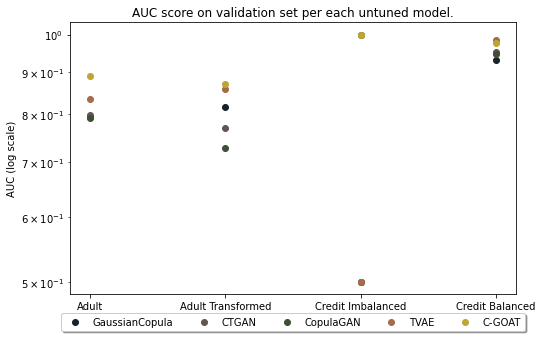

In [149]:
plt.figure(figsize=(8, 5))
for key in results_untuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(results_untuned_val[key]['data_set'], results_untuned_val[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylabel("AUC (log scale)")
# plt.ylim([0.75, 1.01])
plt.title("AUC score on validation set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_validation.jpg", bbox_inches='tight')
plt.show()
plt.close()

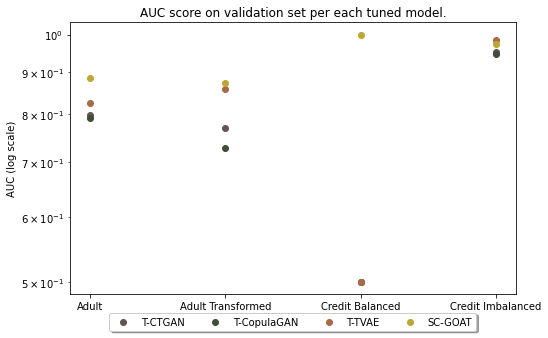

In [150]:
plt.figure(figsize=(8, 5))
for key in results_tuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(results_tuned_val[key]['data_set'], results_tuned_val[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylabel("AUC (log scale)")
# plt.ylim([0.825, 1.01])
plt.title("AUC score on validation set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_validation.jpg", bbox_inches='tight')
plt.show()
plt.close()

In [151]:
results_untuned_test

{'GaussianCopula':             data_set       AUC
 0              Adult  0.762358
 1  Adult Transformed  0.844834
 2  Credit Imbalanced  0.883756
 3    Credit Balanced  0.931923,
 'CTGAN':             data_set       AUC
 0              Adult  0.810699
 1  Adult Transformed  0.758356
 2  Credit Imbalanced  0.000000
 3    Credit Balanced  0.950619,
 'CopulaGAN':             data_set       AUC
 0              Adult  0.779402
 1  Adult Transformed  0.786382
 2  Credit Imbalanced  0.000000
 3    Credit Balanced  0.950468,
 'TVAE':             data_set       AUC
 0              Adult  0.849814
 1  Adult Transformed  0.863489
 2  Credit Imbalanced  0.000000
 3    Credit Balanced  0.982199,
 'C-GOAT':             data_set       AUC
 0              Adult  0.889537
 1  Adult Transformed  0.874446
 2  Credit Imbalanced  0.893686
 3    Credit Balanced  0.974412}

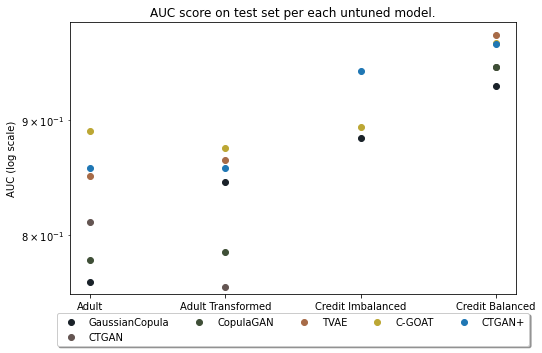

In [152]:
plt.figure(figsize=(8, 5))
for key in results_untuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(results_untuned_test[key]['data_set'], results_untuned_test[key]['AUC'], color = color_, label=key)
plt.scatter(ctgan_plus_auc_test_results['data'], ctgan_plus_auc_test_results['AUC'],label='CTGAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
# plt.ylim([0.7, 1.0])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on test set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()

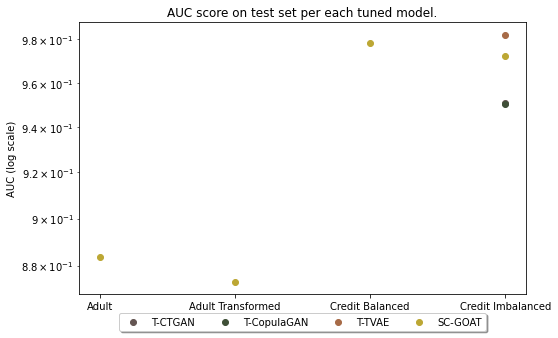

In [153]:
plt.figure(figsize=(8, 5))
for key in results_tuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(results_tuned_test[key]['data_set'], results_tuned_test[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylabel("AUC (log scale)")
# plt.ylim([0.7, 1.0])
plt.title("AUC score on test set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()

# Results Section Final

In [154]:
import pandas as pd
import os
ldname = ['adult', 'encoded_adult', 'balanced_credit_card', 'unbalanced_credit_card']
lmname =['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()

for m_name in ldname:
    for method_name in lmname:
        fname = "../data/output/" + m_name + "_" + method_name + "_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        ltuned = [df.loc['tuned_val_roc', 'Value'], df.loc['tuned_test_roc', 'Value']]
        luntuned = [df.loc['untuned_val_roc', 'Value'], df.loc['untuned_test_roc', 'Value']]
        lmodel =[method_name, method_name]
        ldata = [m_name, m_name]
        lset = ['val', 'test']
        dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
                index = ['data', 'model', 'set', 'untuned', 'tuned']).T])

    for t in ['tuned', 'untuned']:
        fname = "../data/output/" + m_name + "_" + t + '_' +  "models_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        
        if t == 'tuned':
            ltuned = [df['val_roc'], df['test_roc']]
        else:
            luntuned = [df['val_roc'], df['test_roc']]
    lmodel =['SC-GOAT', 'SC_GOAT']
    ldata = [m_name, m_name]
    lset = ['val', 'test']
    dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
            index = ['data', 'model', 'set', 'untuned', 'tuned']).T])

In [155]:
if t == 'tuned':
    ltuned = [df['val_roc'], df['test_roc']]
else:
    luntuned = [df['val_roc'], df['test_roc']]

In [177]:
dfres.tuned = dfres.tuned.astype(float)
dfres.untuned = dfres.untuned.astype(float)
dfres['diff'] = dfres['tuned'] - dfres['untuned']

In [178]:
data_sets = ['Adult', 'Adult Transformed', 'Credit Balanced', 'Credit Imbalanced']

### Results Untuned

In [157]:
columns_needed_untuned = ['data', 'model', 'set', 'untuned']

In [158]:
#     df_temp_individual_models = df_temp_individual_models.loc[df_all_results_individual_models_performance['data_set_full_name']==data_set]
df_results_untuned_val = dfres.loc[dfres['set'] == 'val'][columns_needed_untuned]
df_results_untuned_test = dfres.loc[dfres['set'] == 'test'][columns_needed_untuned]

In [199]:
columns_needed_untuned_model = ['data', 'untuned']
df_results_untuned_val_GaussianCopula = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'GaussianCopula'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_CTGAN = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'CTGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_CopulaGAN = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'CopulaGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_TVAE = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'TVAE'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_SC_GOAT = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'SC-GOAT'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})

df_results_untuned_test_GaussianCopula = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'GaussianCopula'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_CTGAN = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'CTGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_CopulaGAN = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'CopulaGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_TVAE = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'TVAE'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_SC_GOAT = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'SC_GOAT'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})

In [200]:
df_results_untuned_test_SC_GOAT

,data,AUC
1,adult,0.889537
1,encoded_adult,0.874446
1,balanced_credit_card,0.974412
1,unbalanced_credit_card,0.893686


In [210]:
dict_results_untuned_val = {}
dict_results_untuned_val[model_TunedCTGAN] = df_results_untuned_val_CTGAN
dict_results_untuned_val[model_TunedCopulaGAN] = df_results_untuned_val_CopulaGAN
dict_results_untuned_val[model_TunedTVAE] = df_results_untuned_val_TVAE
dict_results_untuned_val[model_CGOAT] = df_results_untuned_val_SC_GOAT
dict_results_untuned_val[model_TunedCTGAN].data = datasets
dict_results_untuned_val[model_TunedCopulaGAN].data = datasets
dict_results_untuned_val[model_TunedTVAE].data = datasets
dict_results_untuned_val[model_CGOAT].data = datasets

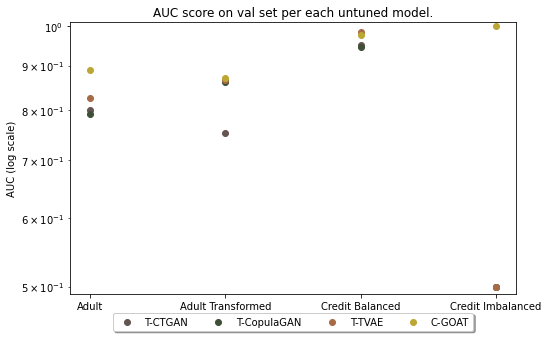

In [226]:
plt.figure(figsize=(8, 5))
for key in dict_results_untuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_untuned_val[key]['data'], dict_results_untuned_val[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49, 1.01])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on val set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_val.jpg", bbox_inches='tight')
plt.show()
plt.close()

In [207]:
dict_results_untuned_test = {}
dict_results_untuned_test[model_TunedCTGAN] = df_results_untuned_test_CTGAN
dict_results_untuned_test[model_TunedCopulaGAN] = df_results_untuned_test_CopulaGAN
dict_results_untuned_test[model_TunedTVAE] = df_results_untuned_test_TVAE
dict_results_untuned_test[model_CGOAT] = df_results_untuned_test_SC_GOAT
dict_results_untuned_test[model_TunedCTGAN].data = datasets
dict_results_untuned_test[model_TunedCopulaGAN].data = datasets
dict_results_untuned_test[model_TunedTVAE].data = datasets
dict_results_untuned_test[model_CGOAT].data = datasets

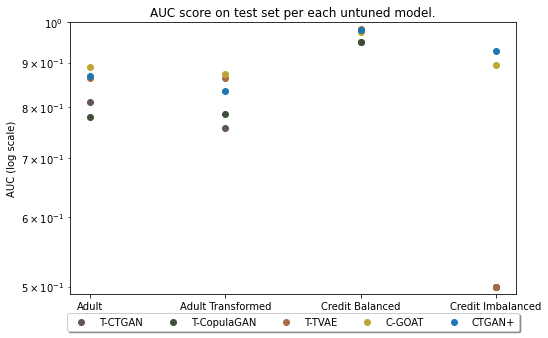

In [228]:
plt.figure(figsize=(8, 5))
for key in dict_results_untuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_untuned_test[key]['data'], dict_results_untuned_test[key]['AUC'], color = color_, label=key)
plt.scatter(ctgan_plus_auc_test_results['data'], ctgan_plus_auc_test_results['AUC'],label='CTGAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49, 1.0])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on test set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()

### Results Tuned

In [163]:
columns_needed_tuned = ['data', 'model', 'set', 'tuned']

In [164]:
df_results_tuned_val = dfres.loc[dfres['set'] == 'val'][columns_needed_tuned]
df_results_tuned_test = dfres.loc[dfres['set'] == 'test'][columns_needed_tuned]

In [173]:
columns_needed_tuned_model = ['data', 'tuned']
df_results_tuned_val_GaussianCopula = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'GaussianCopula'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_CTGAN = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'CTGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_CopulaGAN = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'CopulaGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_TVAE = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'TVAE'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_SC_GOAT = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'SC-GOAT'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})

df_results_tuned_test_GaussianCopula = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'GaussianCopula'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_CTGAN = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'CTGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_CopulaGAN = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'CopulaGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_TVAE = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'TVAE'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_SC_GOAT = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'SC_GOAT'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})

In [212]:
dict_results_tuned_val = {}
dict_results_tuned_val[model_TunedCTGAN] = df_results_tuned_val_CTGAN
dict_results_tuned_val[model_TunedCopulaGAN] = df_results_tuned_val_CopulaGAN
dict_results_tuned_val[model_TunedTVAE] = df_results_tuned_val_TVAE
dict_results_tuned_val[model_SCGOAT] = df_results_tuned_val_SC_GOAT

dict_results_tuned_val[model_TunedCTGAN].data = datasets
dict_results_tuned_val[model_TunedCopulaGAN].data = datasets
dict_results_tuned_val[model_TunedTVAE].data = datasets
dict_results_tuned_val[model_SCGOAT].data = datasets

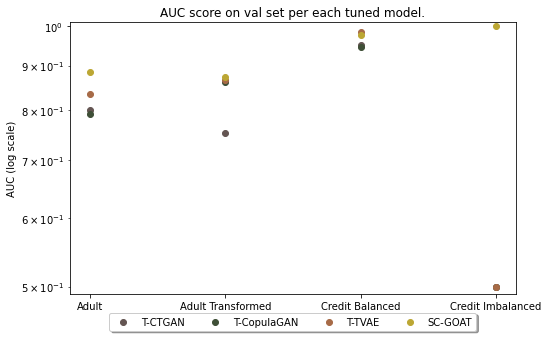

In [224]:
plt.figure(figsize=(8, 5))
for key in dict_results_tuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_tuned_val[key]['data'], dict_results_tuned_val[key]['AUC'], color = color_, label=key)
# plt.scatter(ctgan_plus_auc_test_results['data_set'], ctgan_plus_auc_test_results['AUC'],label='CTGAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49, 1.01])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on val set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_val.jpg", bbox_inches='tight')
plt.show()
plt.close()

In [213]:
dict_results_tuned_test = {}
dict_results_tuned_test[model_TunedCTGAN] = df_results_tuned_test_CTGAN
dict_results_tuned_test[model_TunedCopulaGAN] = df_results_tuned_test_CopulaGAN
dict_results_tuned_test[model_TunedTVAE] = df_results_tuned_test_TVAE
dict_results_tuned_test[model_SCGOAT] = df_results_tuned_test_SC_GOAT

dict_results_tuned_test[model_TunedCTGAN].data = datasets
dict_results_tuned_test[model_TunedCopulaGAN].data = datasets
dict_results_tuned_test[model_TunedTVAE].data = datasets
dict_results_tuned_test[model_SCGOAT].data = datasets

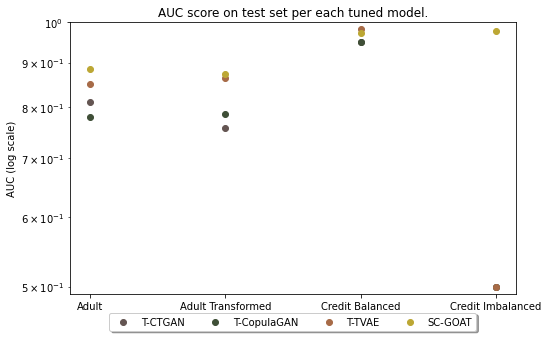

In [222]:
plt.figure(figsize=(8, 5))
for key in dict_results_tuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_tuned_test[key]['data'], dict_results_tuned_test[key]['AUC'], color = color_, label=key)
# plt.scatter(ctgan_plus_auc_test_results['data_set'], ctgan_plus_auc_test_results['AUC'],label='CTGAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49 , 1.0])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on test set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()